In [ ]:
https://aqicn.org/forecast/
https://medium.com/analytics-vidhya/arima-model-from-scratch-in-python-489e961603ce#:~:text=ARIMA%20is%20a%20model%20used,data%20and%20check%20the%20results.
https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
https://laptrinhx.com/arima-model-from-scratch-in-python-3262984784/
https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
https://towardsdatascience.com/forecasting-exchange-rates-using-arima-in-python-f032f313fc56
https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7
https://medium.com/@Mukesh_Kumar/text-extraction-from-docx-readable-pdf-and-scanned-pdf-formats-in-python-b6c5712271ee#:~:text=To%20extract%20tables%20content%2C%20we,then%20export%20them%20in%20excel.&text=In%20the%20above%20code%2C%20'path,excel%20file%20will%20be%20saved.
https://aqicn.org/data-platform/register/
https://github.com/RakeshBhugra/Forecasting-Air-Pollution-Using-ARIMA-model-and-Logistic-Regression
https://github.com/ninjakx/AQP
https://github.com/gmonaci/ARIMA/blob/master/time-series-analysis-ARIMA.ipynb
https://www.geeksforgeeks.org/replace-nan-values-with-zeros-in-pandas-dataframe/
https://stackoverflow.com/questions/43332057/pandas-strip-white-space
https://www.machinelearningplus.com/time-series/time-series-analysis-python/
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
https://www.linkedin.com/pulse/change-data-type-columns-pandas-mohit-sharma#:~:text=The%20best%20way%20to%20convert,floating%2Dpoint%20numbers%20as%20appropriate.
https://stackoverflow.com/questions/44300989/get-max-value-from-row-of-a-dataframe-in-python
https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/
https://www.kaggle.com/sumi25/understand-arima-and-tune-p-d-q

# AirPollution

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv("/content/gdrive/My Drive/data/velachery_air_quality_29_months.csv")

In [ ]:
data.head(50)

,date,pm25,o3,no2,so2,co
0,2021/3/1,62,31,4,4,4
1,2021/3/2,93,6,4,4,4
2,2021/3/3,118,4,4,4,4
3,2021/3/4,95,5,4,4,4
4,2021/3/5,87,1,4,4,4
5,2021/3/6,65,3,4,4,3
6,2021/3/7,106,,,,
7,2021/2/1,73,17,5,12,4
8,2021/2/2,123,7,5,12,3
9,2021/2/3,90,3,5,13,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    798 non-null    object
 1    pm25   798 non-null    object
 2    o3     798 non-null    object
 3    no2    798 non-null    object
 4    so2    798 non-null    object
 5    co     798 non-null    object
dtypes: object(6)
memory usage: 37.5+ KB


In [ ]:
data.describe()

,date,pm25,o3,no2,so2,co
count,798,798,798,798,798,798
unique,798,153,60,17,23,14
top,2018/12/7,85,6,4,1,4
freq,1,21,51,128,317,171


In [ ]:
data.columns

Index(['date', ' pm25', ' o3', ' no2', ' so2', ' co'], dtype='object')

In [ ]:
data[' pm25'].fillna(0)

0        62
1        93
2       118
3        95
4        87
       ... 
793        
794        
795        
796        
797        
Name:  pm25, Length: 798, dtype: object

In [ ]:
data.columns = ['Date', 'PM25', "O3", "NO2", "SO2", "CO"]

In [ ]:
data.columns

Index(['Date', 'PM25', 'O3', 'NO2', 'SO2', 'CO'], dtype='object')

In [ ]:
data['PM25'] = data['PM25'].fillna(0)
data['O3'] = data['O3'].fillna(0)
data['NO2'] = data['NO2'].fillna(0)
data['SO2'] = data['SO2'].fillna(0)
data['CO'] = data['CO'].fillna(0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    798 non-null    object
 1   PM25    798 non-null    object
 2   O3      798 non-null    object
 3   NO2     798 non-null    object
 4   SO2     798 non-null    object
 5   CO      798 non-null    object
dtypes: object(6)
memory usage: 37.5+ KB


In [ ]:
data.head(50)

,Date,PM25,O3,NO2,SO2,CO
0,2021/3/1,62,31,4,4,4
1,2021/3/2,93,6,4,4,4
2,2021/3/3,118,4,4,4,4
3,2021/3/4,95,5,4,4,4
4,2021/3/5,87,1,4,4,4
5,2021/3/6,65,3,4,4,3
6,2021/3/7,106,,,,
7,2021/2/1,73,17,5,12,4
8,2021/2/2,123,7,5,12,3
9,2021/2/3,90,3,5,13,3


In [ ]:
data.iloc[0, 1:]

PM25     62
O3       31
NO2       4
SO2       4
CO        4
Name: 0, dtype: object

In [ ]:
np.max(data.iloc[0, 1:])

' 62'

In [ ]:
data.columns

Index(['Date', 'PM25', 'O3', 'NO2', 'SO2', 'CO'], dtype='object')

In [ ]:
data["PM25"] = data["PM25"].str.strip()
data["O3"] = data["O3"].str.strip()
data["NO2"] = data["NO2"].str.strip()
data["SO2"] = data["SO2"].str.strip()
data["CO"] = data["CO"].str.strip()

In [ ]:
np.max(data.iloc[0, 1:])

'62'

In [ ]:
data["PM25"].dtypes

dtype('O')

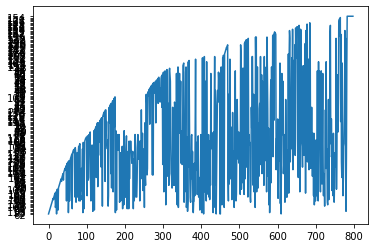

In [ ]:
plt.plot(data["PM25"])

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv')
df = df.loc[df.market=='MUMBAI', :]
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008


In [ ]:
df.dtypes

market      object
month       object
year         int64
quantity     int64
priceMin     int64
priceMax     int64
priceMod     int64
state       object
city        object
date        object
dtype: object

In [ ]:
data['PM25'].dtype

dtype('O')

In [ ]:
pd.to_numeric(data["PM25"])

0       62.0
1       93.0
2      118.0
3       95.0
4       87.0
       ...  
793      NaN
794      NaN
795      NaN
796      NaN
797      NaN
Name: PM25, Length: 798, dtype: float64

In [ ]:
pd.to_numeric(data["PM25"]).fillna(0).astype(int)

0       62
1       93
2      118
3       95
4       87
      ... 
793      0
794      0
795      0
796      0
797      0
Name: PM25, Length: 798, dtype: int64

In [ ]:
data.columns

Index(['Date', 'PM25', 'O3', 'NO2', 'SO2', 'CO'], dtype='object')

In [ ]:
data["PM25"] = pd.to_numeric(data["PM25"]).fillna(0).astype(int)
data["O3"] = pd.to_numeric(data["O3"]).fillna(0).astype(int)
data["NO2"] = pd.to_numeric(data["NO2"]).fillna(0).astype(int)
data["SO2"] = pd.to_numeric(data["SO2"]).fillna(0).astype(int)
data["CO"] = pd.to_numeric(data["CO"]).fillna(0).astype(int)

In [ ]:
data.dtypes

Date    object
PM25     int64
O3       int64
NO2      int64
SO2      int64
CO       int64
dtype: object

In [ ]:
pd.to_datetime(data["Date"])

0     2021-03-01
1     2021-03-02
2     2021-03-03
3     2021-03-04
4     2021-03-05
         ...    
793   2019-06-21
794   2018-12-31
795   2018-11-29
796   2018-12-14
797   2019-12-25
Name: Date, Length: 798, dtype: datetime64[ns]

In [ ]:
data["Date"] = pd.to_datetime(data["Date"])

In [ ]:
data.dtypes

Date    datetime64[ns]
PM25             int64
O3               int64
NO2              int64
SO2              int64
CO               int64
dtype: object

In [ ]:
data["AQI"] = data.max(axis=1)

In [ ]:
data.head()

,Date,PM25,O3,NO2,SO2,CO,AQI
0,2021-03-01,62,31,4,4,4,62
1,2021-03-02,93,6,4,4,4,93
2,2021-03-03,118,4,4,4,4,118
3,2021-03-04,95,5,4,4,4,95
4,2021-03-05,87,1,4,4,4,87


In [ ]:
data.tail()

,Date,PM25,O3,NO2,SO2,CO,AQI
793,2019-06-21,0,49,6,1,10,49
794,2018-12-31,0,38,4,1,6,38
795,2018-11-29,0,12,5,2,5,12
796,2018-12-14,0,37,4,3,6,37
797,2019-12-25,0,0,2,2,4,4


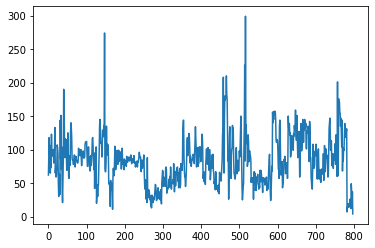

In [ ]:
plt.plot(data["AQI"])

In [ ]:
df = data.iloc[:, [0, 6]]

In [ ]:
df.head()

,Date,AQI
0,2021-03-01,62
1,2021-03-02,93
2,2021-03-03,118
3,2021-03-04,95
4,2021-03-05,87


In [ ]:
# determine rolling statistics

rolmean = df.rolling(window=365).mean()

rolmean

,AQI
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
793,90.076712
794,89.983562
795,89.783562
796,89.630137


In [ ]:
rolstd = df.rolling(window=365).std()

rolstd

,AQI
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
793,40.541454
794,40.622082
795,40.825880
796,40.918878


In [ ]:
df.unstack()

Date  0      2021-03-01 00:00:00
      1      2021-03-02 00:00:00
      2      2021-03-03 00:00:00
      3      2021-03-04 00:00:00
      4      2021-03-05 00:00:00
                    ...         
AQI   793                     49
      794                     38
      795                     12
      796                     37
      797                      4
Length: 1596, dtype: object

In [ ]:
df = df.set_index("Date")

In [ ]:
df.head()

,AQI
Date,
2021-03-01,62
2021-03-02,93
2021-03-03,118
2021-03-04,95
2021-03-05,87


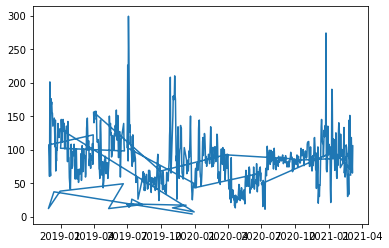

In [ ]:
plt.plot(df)

In [ ]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dftest = adfuller(df["AQI"], autolag="AIC")

In [ ]:
dfoutput = pd.Series(dftest[0:4], index=['Test Statisstic', 'P-Value', '#Lags Used', "Number of Observations Used"])

In [ ]:
for key, value in dftest[4].items():
  dfoutput[f'Critical Values {key}'] = value

dfoutput

Test Statisstic                 -4.788992
P-Value                          0.000057
#Lags Used                       8.000000
Number of Observations Used    789.000000
Critical Values 1%              -3.438665
Critical Values 5%              -2.865210
Critical Values 10%             -2.568724
dtype: float64

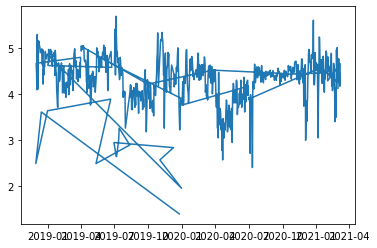

In [ ]:
df_log_scale = np.log(df)

plt.plot(df_log_scale)

In [ ]:
rolmean = df.rolling(window=12).mean()

rolmean

,AQI
Date,
2021-03-01,NaN
2021-03-02,NaN
2021-03-03,NaN
2021-03-04,NaN
2021-03-05,NaN
...,...
2019-06-21,19.083333
2018-12-31,21.666667
2018-11-29,21.583333


In [ ]:
rolstd = df.rolling(window=12).std()

rolstd

,AQI
Date,
2021-03-01,NaN
2021-03-02,NaN
2021-03-03,NaN
2021-03-04,NaN
2021-03-05,NaN
...,...
2019-06-21,10.604102
2018-12-31,11.154562
2018-11-29,11.228684


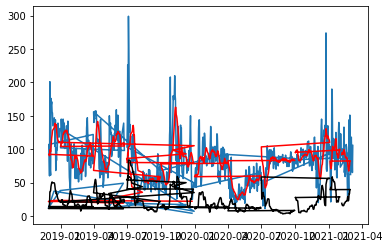

In [ ]:
plt.plot(df)
plt.plot(rolmean, color='red', label="Rolling Mean")
plt.plot(rolstd, color='black', label="Rolling Std")

In [ ]:
rolmean = df_log_scale.rolling(window=12).mean()

rolmean

,AQI
Date,
2021-03-01,NaN
2021-03-02,NaN
2021-03-03,NaN
2021-03-04,NaN
2021-03-05,NaN
...,...
2019-06-21,2.840065
2018-12-31,2.981038
2018-11-29,2.974368


In [ ]:
rolstd = df_log_scale.rolling(window=12).std()

rolstd

,AQI
Date,
2021-03-01,NaN
2021-03-02,NaN
2021-03-03,NaN
2021-03-04,NaN
2021-03-05,NaN
...,...
2019-06-21,0.469938
2018-12-31,0.429302
2018-11-29,0.436909


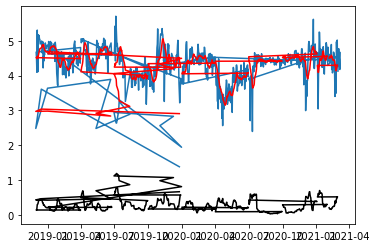

In [ ]:
plt.plot(df_log_scale)
plt.plot(rolmean, color='red', label="Rolling Mean")
plt.plot(rolstd, color='black', label="Rolling Std")

In [ ]:
df_log_scale_minus_rolmean = df_log_scale - rolmean
df_log_scale_minus_rolmean.head(12)

,AQI
Date,
2021-03-01,NaN
2021-03-02,NaN
2021-03-03,NaN
2021-03-04,NaN
2021-03-05,NaN
2021-03-06,NaN
2021-03-07,NaN
2021-02-01,NaN
2021-02-02,NaN


In [ ]:
df_log_scale_minus_rolmean.dropna(inplace=True)
df_log_scale_minus_rolmean.head(12)

,AQI
Date,
2021-02-05,0.104627
2021-02-06,0.036870
2021-02-07,0.061282
2021-02-08,-0.129474
2021-02-09,0.032676
2021-02-10,0.110042
2021-02-11,0.305999
2021-02-12,-0.369209
2021-02-13,-0.253136


In [ ]:
def test_stationary(timeseries):
  rolmean = timeseries.rolling(window=12).mean()
  rolstd = timeseries.rolling(window=12).std()
  plt.plot(timeseries)
  plt.plot(rolmean, color='red', label="Rolling Mean")
  plt.plot(rolstd, color='black', label="Rolling Std")

  dftest = adfuller(timeseries["AQI"], autolag="AIC")
  dfoutput = pd.Series(dftest[0:4], index=['Test Statisstic', 'P-Value', '#Lags Used', "Number of Observations Used"])

  for key, value in dftest[4].items():
    dfoutput[f'Critical Values {key}'] = value

  print(dfoutput)

Test Statisstic               -7.328069e+00
P-Value                        1.147002e-10
#Lags Used                     1.100000e+01
Number of Observations Used    7.750000e+02
Critical Values 1%            -3.438816e+00
Critical Values 5%            -2.865277e+00
Critical Values 10%           -2.568760e+00
dtype: float64


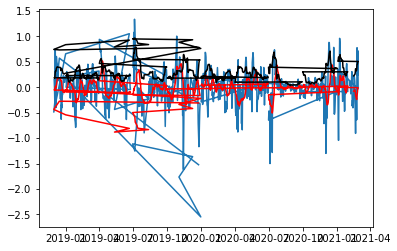

In [ ]:
test_stationary(df_log_scale_minus_rolmean)

Test Statisstic                 -4.788992
P-Value                          0.000057
#Lags Used                       8.000000
Number of Observations Used    789.000000
Critical Values 1%              -3.438665
Critical Values 5%              -2.865210
Critical Values 10%             -2.568724
dtype: float64


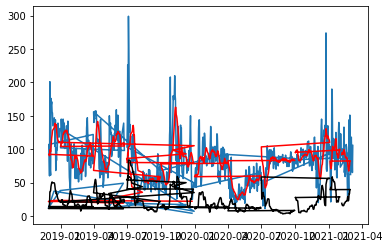

In [ ]:
test_stationary(df)

In [ ]:
df.head()

,AQI
Date,
2021-03-01,62
2021-03-02,93
2021-03-03,118
2021-03-04,95
2021-03-05,87


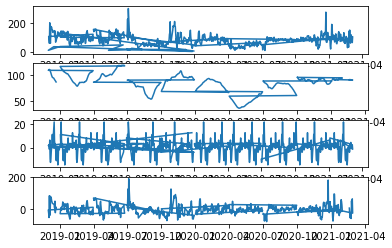

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df, freq=50)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df)
plt.subplot(412)
plt.plot(trend)
plt.subplot(413)
plt.plot(seasonal)
plt.subplot(414)
plt.plot(residual)

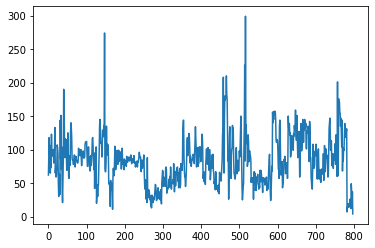

In [ ]:
plt.plot(data["AQI"])

In [ ]:
train = data["AQI"].values

In [ ]:
train

array([ 62,  93, 118,  95,  87,  65, 106,  73, 123,  90,  91, 100,  97,
       100,  80,  94, 103, 133,  65,  73,  59,  62,  76, 107, 103,  95,
        50,  30,  55,  63,  33, 144,  86, 151,  71, 104,  41,  21,  54,
        86, 190, 187, 116,  88, 116, 109, 115,  91,  69,  79, 103, 125,
        93,  59,  57,  91,  76,  81, 126, 140, 132, 117,  87,  84,  85,
        78,  78,  84,  92,  80,  74,  85,  90,  83,  83,  84,  80,  80,
        85, 102,  91,  96,  99,  91,  94, 100,  88,  76,  88,  92,  93,
        98,  88,  87,  88,  89, 108, 111, 111, 112, 112,  94,  75,  75,
        86, 104,  82,  89,  72,  68,  86,  91,  76,  85,  96, 117, 118,
       104,  83,  70,  95,  42,  79,  58,  77, 104,  20,  32,  47,  30,
        47,  47,  77,  98, 135, 145, 132, 113, 109, 110,  89, 106, 129,
       119, 120, 136, 129, 274,  71,  67,  67,  82, 135,  96,  92, 108,
       106,  94,  49,  51,  47,  46,  15,  54,  43,  50,  42,  37,  11,
        59,  72,  64,  61,  77, 105,  93,  70,  75,  95,  85,  9

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
model = ARIMA(train, order=(0,0,2))
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

In [ ]:
for i in range(3):
  print(model_fit.forecast()[i])

[50.30324221]
[26.71271079]
[[ -2.05270886 102.65919328]]


In [ ]:
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(train)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = train[t]
	predictions.append(yhat)
	history.append(obs)

In [ ]:
for i in range(100):
    print('predicted=%f, expected=%f' % (predictions[i], train[i]))

predicted=82.896379, expected=62.000000
predicted=82.896379, expected=93.000000
predicted=82.896379, expected=118.000000
predicted=82.896379, expected=95.000000
predicted=82.896379, expected=87.000000
predicted=82.896379, expected=65.000000
predicted=82.896379, expected=106.000000
predicted=82.896379, expected=73.000000
predicted=82.896379, expected=123.000000
predicted=82.896379, expected=90.000000
predicted=82.896379, expected=91.000000
predicted=82.896379, expected=100.000000
predicted=82.896379, expected=97.000000
predicted=82.896379, expected=100.000000
predicted=82.896379, expected=80.000000
predicted=82.896379, expected=94.000000
predicted=82.896379, expected=103.000000
predicted=82.896379, expected=133.000000
predicted=82.896379, expected=65.000000
predicted=82.896379, expected=73.000000
predicted=82.896379, expected=59.000000
predicted=82.896379, expected=62.000000
predicted=82.896379, expected=76.000000
predicted=82.896379, expected=107.000000
predicted=82.896379, expected=10

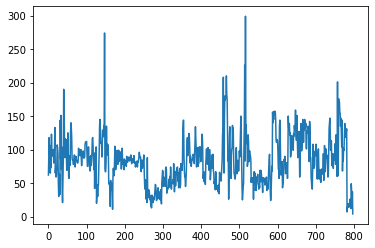

In [ ]:
data["AQI"].plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(data["AQI"])

Results of Dickey-Fuller Test:
Test Statistic                  -4.788992
p-value                          0.000057
#Lags Used                       8.000000
Number of Observations Used    789.000000
Critical Value (1%)             -3.438665
Critical Value (5%)             -2.865210
Critical Value (10%)            -2.568724
dtype: float64


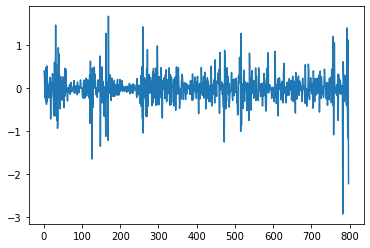

In [ ]:
data['AQI_log'] = np.log(data["AQI"])
data['AQI_log_diff'] = data['AQI_log'] - data['AQI_log'].shift(1)
data['AQI_log_diff'].dropna().plot()

In [ ]:
data.dropna(axis=0, inplace=True)

In [ ]:
data['AQI_log_diff'].head()

1    0.405465
2    0.238085
3   -0.216808
4   -0.087969
5   -0.291521
Name: AQI_log_diff, dtype: float64

In [ ]:
data.head()

,Date,PM25,O3,NO2,SO2,CO,AQI,AQI_log,AQI_log_diff
1,2021-03-02,93,6,4,4,4,93,4.532599,0.405465
2,2021-03-03,118,4,4,4,4,118,4.770685,0.238085
3,2021-03-04,95,5,4,4,4,95,4.553877,-0.216808
4,2021-03-05,87,1,4,4,4,87,4.465908,-0.087969
5,2021-03-06,65,3,4,4,3,65,4.174387,-0.291521


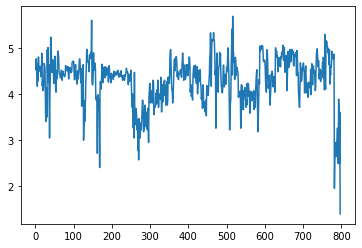

In [ ]:
data['AQI_log'].plot()

In [ ]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(data['AQI_log_diff'],nlags=20)
lag_pacf = pacf(data['AQI_log_diff'],nlags=20,method='ols')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Autocorrelation Function')

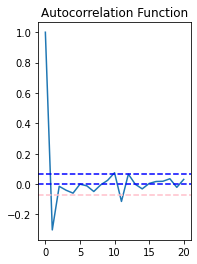

In [ ]:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(data['AQI_log_diff'])),linestyle='--',color='pink')
plt.axhline(y=1.96/np.sqrt(len(data['AQI_log_diff'])),linestyle='--',color='blue')
plt.title('Autocorrelation Function')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: nan')

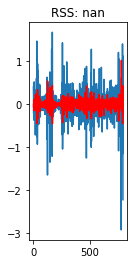

In [ ]:
plt.subplot(131)
model = ARIMA(data['AQI_log'],order=(2,1,0))
result_AR = model.fit(disp=-1)
plt.plot(data['AQI_log_diff'])
plt.plot(result_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((result_AR.fittedvalues-data['AQI_log_diff'])**2))

In [ ]:
pred_arima_dif = pd.Series(result_AR.fittedvalues,copy=True)
arima_dif_cumsum = pred_arima_dif.cumsum()

pred_arima_log = pd.Series(data['AQI_log'], index=data.index)
pred_arima_log = pred_arima_log.add(arima_dif_cumsum,fill_value=0)
print(pred_arima_log.head())

pred = np.exp(pred_arima_log)

1    4.532599
2    4.767437
3    4.471095
4    4.426720
5    4.187310
dtype: float64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 1 to 797
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          797 non-null    datetime64[ns]
 1   PM25          797 non-null    int64         
 2   O3            797 non-null    int64         
 3   NO2           797 non-null    int64         
 4   SO2           797 non-null    int64         
 5   CO            797 non-null    int64         
 6   AQI           797 non-null    int64         
 7   AQI_log       797 non-null    float64       
 8   AQI_log_diff  797 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 102.3 KB


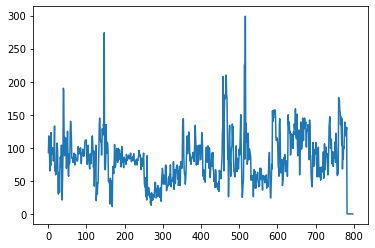

In [ ]:
data["PM25"].plot()

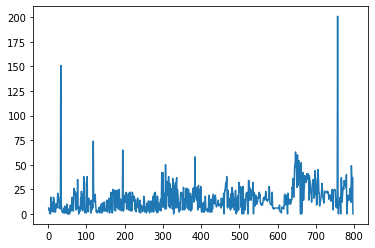

In [ ]:
data["O3"].plot()

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/data/velachery_air_quality_29_months.csv")

In [ ]:
df.columns = ['Date', 'PM25', "O3", "NO2", "SO2", "CO"]

In [ ]:
df["PM25"] = df["PM25"].str.strip()
df["O3"] = df["O3"].str.strip()
df["NO2"] = df["NO2"].str.strip()
df["SO2"] = df["SO2"].str.strip()
df["CO"] = df["CO"].str.strip()

In [ ]:
df.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Date,PM25,O3,NO2,SO2,CO
count,798,798,798,798,798,798
unique,798,153,60,17,23,14
top,2019-07-06 00:00:00,85,6,4,1,4
freq,1,21,51,128,317,171
first,2018-11-29 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2021-03-07 00:00:00,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    798 non-null    datetime64[ns]
 1   PM25    798 non-null    object        
 2   O3      798 non-null    object        
 3   NO2     798 non-null    object        
 4   SO2     798 non-null    object        
 5   CO      798 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 37.5+ KB


In [ ]:
df.isnull().any()

Date    False
PM25    False
O3      False
NO2     False
SO2     False
CO      False
dtype: bool

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
df.dtypes

Date    datetime64[ns]
PM25            object
O3              object
NO2             object
SO2             object
CO              object
dtype: object